In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import cmath
import scipy as sp
%matplotlib inline

In [2]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = np.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [5]:
class Source:
    """Contains information related to a source (or sink)."""
    def __init__(self, strength, x, y):
        """Initializes the singularity.
        
        Arguments
        ---------
        strength -- strength of the singularity.
        x, y -- coordinates of the singularity.
        """
        self.strength = strength
        self.x, self.y = x, y
    
    def velocity(self, X, Y):
        """Computes the velocity field generated by the singularity.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.u = self.strength/(2*np.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*np.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    
    def stream_function(self, X, Y):
        """Computes the stream-function generated by the singularity.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.psi = self.strength/(2*np.pi)*np.arctan2((Y-self.y), (X-self.x))

In [7]:
strength_source = 1.0                  # strength of the source         
x_source, y_source = 0.0, 0.5          # location of the source

# creates a source (object of class Source) 
source = Source(strength_source, x_source, y_source)

# computes the velocity field and the stream-function on the mesh grid
source.velocity(X, Y)
source.stream_function(X, Y)

In [8]:
# creates the image of the source and computes velocity and stream-function
source_image = Source(strength_source, x_source, -y_source)
source_image.velocity(X, Y)
source_image.stream_function(X, Y)

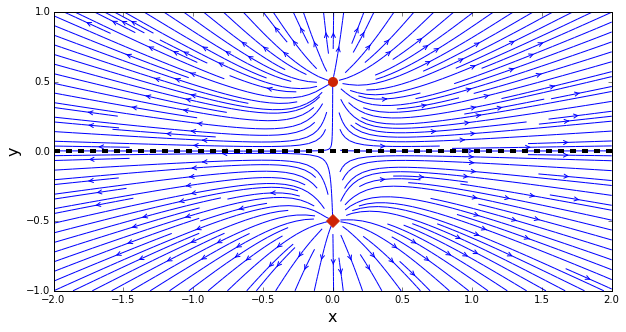

In [9]:
# superposition of the source and its image
u = source.u + source_image.u
v = source.v + source_image.v
psi = source.psi + source_image.psi

# plots the streamlines

size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(source.x, source.y, color='#CD2305', s=80, marker='o')
plt.scatter(source_image.x, source_image.y, color='#CD2305', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

In [12]:
class Vortex:
    """Contains information related to a vortex."""
    def __init__(self, strength, x, y):
        """Initializes the vortex.
        
        Arguments
        ---------
        strength -- strength of the vortex.
        x, y -- coordinates of the vortex.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """Computes the velocity field generated by a vortex.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.u = +self.strength/(2*np.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
        self.v = -self.strength/(2*np.pi)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        
    def stream_function(self, X, Y):
        """Computes the stream-function generated by a vortex.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.psi = -self.strength/(4*np.pi)*np.log((X-self.x)**2+(Y-self.y)**2)

In [13]:
strength_vortex = 1.0                  # strength of the vortex
x_vortex, y_vortex = 0.0, 0.5          # location of the vortex

# creates a vortex and computes velocity and stream-function
vortex = Vortex(strength_vortex, x_vortex, y_vortex)
vortex.velocity(X, Y)
vortex.stream_function(X, Y)

# creates the image of the vortex and computes velocity and stream-function
vortex_image = Vortex(-strength_vortex, x_vortex, -y_vortex)
vortex_image.velocity(X, Y)
vortex_image.stream_function(X, Y)

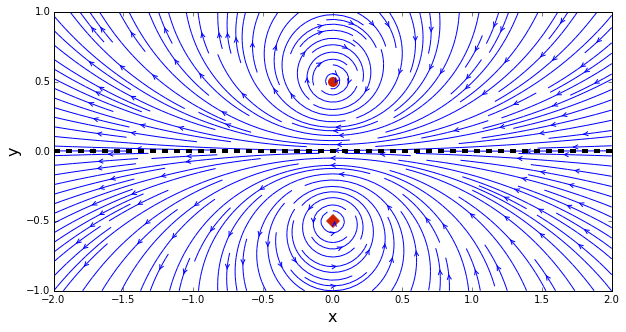

In [14]:
# superposition of the vortex and its image
u = vortex.u + vortex_image.u
v = vortex.v + vortex_image.v
psi = vortex.psi + vortex_image.psi

# plots the streamlines
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(vortex.x, vortex.y, color='#CD2305', s=80, marker='o')
plt.scatter(vortex_image.x, vortex_image.y, color='#CD2305', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

In [15]:
strength_vortex = 1.0                  # absolute value of each vortex strength
x_vortex1, y_vortex1 = -0.1, 0.5       # location of the first vortex
x_vortex2, y_vortex2 = +0.1, 0.5       # location of the second vortex

# creates two vortices at different locations
vortex1 = Vortex(+strength_vortex, x_vortex1, y_vortex1)
vortex2 = Vortex(-strength_vortex, x_vortex2, y_vortex2)

# computes the velocity and stream-function for each vortex
vortex1.velocity(X, Y)
vortex1.stream_function(X, Y)
vortex2.velocity(X, Y)
vortex2.stream_function(X, Y)

# creates an image for each vortex
vortex1_image = Vortex(-strength_vortex, x_vortex1, -y_vortex1)
vortex2_image = Vortex(+strength_vortex, x_vortex2, -y_vortex2)

# computes the velcoity and stream-function of each image
vortex1_image.velocity(X, Y)
vortex1_image.stream_function(X, Y)
vortex2_image.velocity(X, Y)
vortex2_image.stream_function(X, Y)

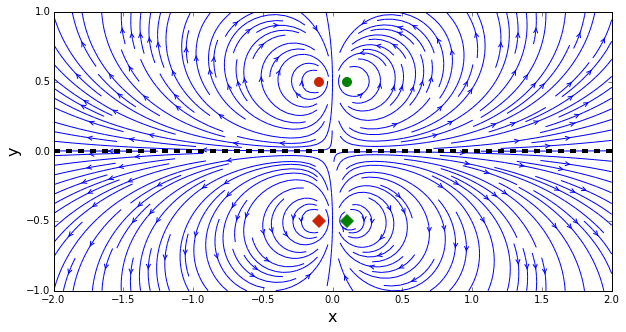

In [16]:
# superposition of the vortex pair and its image
u = vortex1.u + vortex2.u + vortex1_image.u + vortex2_image.u
v = vortex1.v + vortex2.v + vortex1_image.v + vortex2_image.v
psi = vortex1.psi + vortex2.psi + vortex1_image.psi + vortex2_image.psi

# plot the streamlines
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(vortex1.x, vortex1.y, color='#CD2305', s=80, marker='o')
plt.scatter(vortex2.x, vortex2.y, color='g', s=80, marker='o')
plt.scatter(vortex1_image.x, vortex1_image.y, color='#CD2305', s=80, marker='D')
plt.scatter(vortex2_image.x, vortex2_image.y, color='g', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);

In [17]:
u_inf = 1.0    # free-stream speed

# calculates the velocity and stream-function of the free-stream flow
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [18]:
class Doublet:
    """Contains information related to a doublet."""
    def __init__(self, strength, x, y):
        """Initializes the doublet.
        
        Arguments
        ---------
        strength -- strength of the doublet.
        x, y -- coordinates of the doublet.
        """
        self.strength = strength
        self.x, self.y = x, y
        
    def velocity(self, X, Y):
        """Computes the velocity field generated by a doublet.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.u = -self.strength/(2*np.pi)*\
                ((X-self.x)**2-(Y-self.y)**2)/((X-self.x)**2+(Y-self.y)**2)**2
        self.v = -self.strength/(2*np.pi)*\
                2*(X-self.x)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)**2
            
    def stream_function(self, X, Y):
        """Computes the stream-function generated by a doublet.
        
        Arguments
        ---------
        X, Y -- mesh grid.
        """
        self.psi = -self.strength/(2*np.pi)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2)

In [19]:
strength_doublet = 1.0                # strength of the doublet
x_doublet, y_doublet = 0.0, 0.3       # location of the doublet

# creates a doublet (object of class Doublet)
doublet = Doublet(strength_doublet, x_doublet, y_doublet)

# computes the velocity and stream-function of the doublet on the mesh
doublet.velocity(X, Y)
doublet.stream_function(X, Y)

# creates the image of the doublet
doublet_image = Doublet(strength_doublet, x_doublet, -y_doublet)

# computes the velocity and stream-function of the image on the mesh
doublet_image.velocity(X, Y)
doublet_image.stream_function(X, Y)

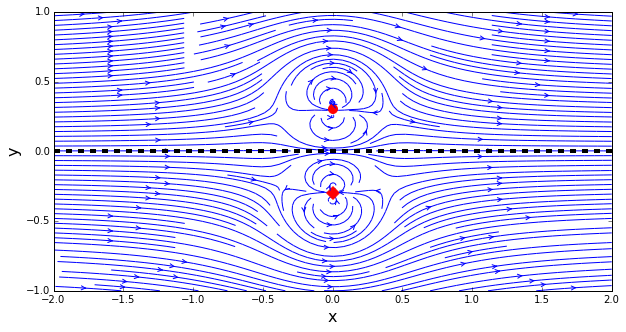

In [20]:
# superposition of the doublet and its image to the uniform flow
u = u_freestream + doublet.u + doublet_image.u
v = v_freestream + doublet.v + doublet_image.v
psi = psi_freestream + doublet.psi + doublet_image.psi

# plots the streamlines
size = 10
plt.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(doublet.x, doublet.y, color='r', s=80, marker='o')
plt.scatter(doublet_image.x, doublet_image.y, color='r', s=80, marker='D')
plt.axhline(0., color='k', linestyle='--', linewidth=4);